In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics as mt

In [2]:
df = pd.read_excel('DS2_C5_S5_HR_Data_Practice.xlsx')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,4649
1,0.80,0.86,5,262,6,0,1,0,sales,medium,34126
2,0.11,0.88,7,272,4,0,1,0,sales,medium,40522
3,0.72,0.87,5,223,5,0,1,0,sales,low,6916
4,0.37,0.52,2,159,3,0,1,0,sales,low,10928
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,5089
14995,0.37,0.48,2,160,3,0,1,0,support,low,4001
14996,0.37,0.53,2,143,3,0,1,0,support,low,12842
14997,0.11,0.96,6,280,4,0,1,0,support,low,8849


In [3]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
salary_num               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  salary_num             14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
salary_num                 int64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
salary_num,14999.0,30085.475432,33465.313560,1.00,10334.00,20875.00,38186.50,199768.0


In [7]:
temp1 = df['left'].groupby(df['salary']).count()
temp1

salary
high      1237
low       7316
medium    6446
Name: left, dtype: int64

<AxesSubplot:xlabel='left', ylabel='count'>

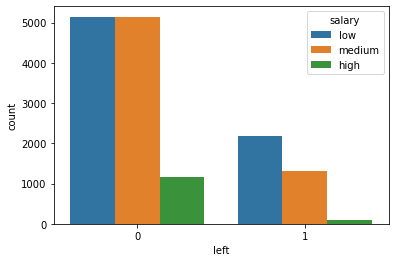

In [8]:
# task 1

sns.countplot(x = df['left'], hue = df['salary'])

<AxesSubplot:xlabel='left', ylabel='count'>

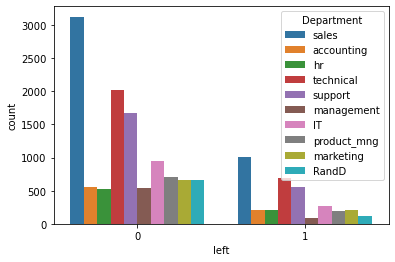

In [9]:
# task 2

sns.countplot(x = df['left'], hue = df['Department'])

In [10]:
# task 2
#a

df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
salary_num               0
dtype: int64

In [11]:
# b

df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.046656
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.022006
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.007598
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.006997
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.047869
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.006091
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.140561
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.091209
salary_num,0.046656,-0.022006,-0.007598,-0.006997,0.047869,0.006091,-0.140561,0.091209,1.000000


<AxesSubplot:>

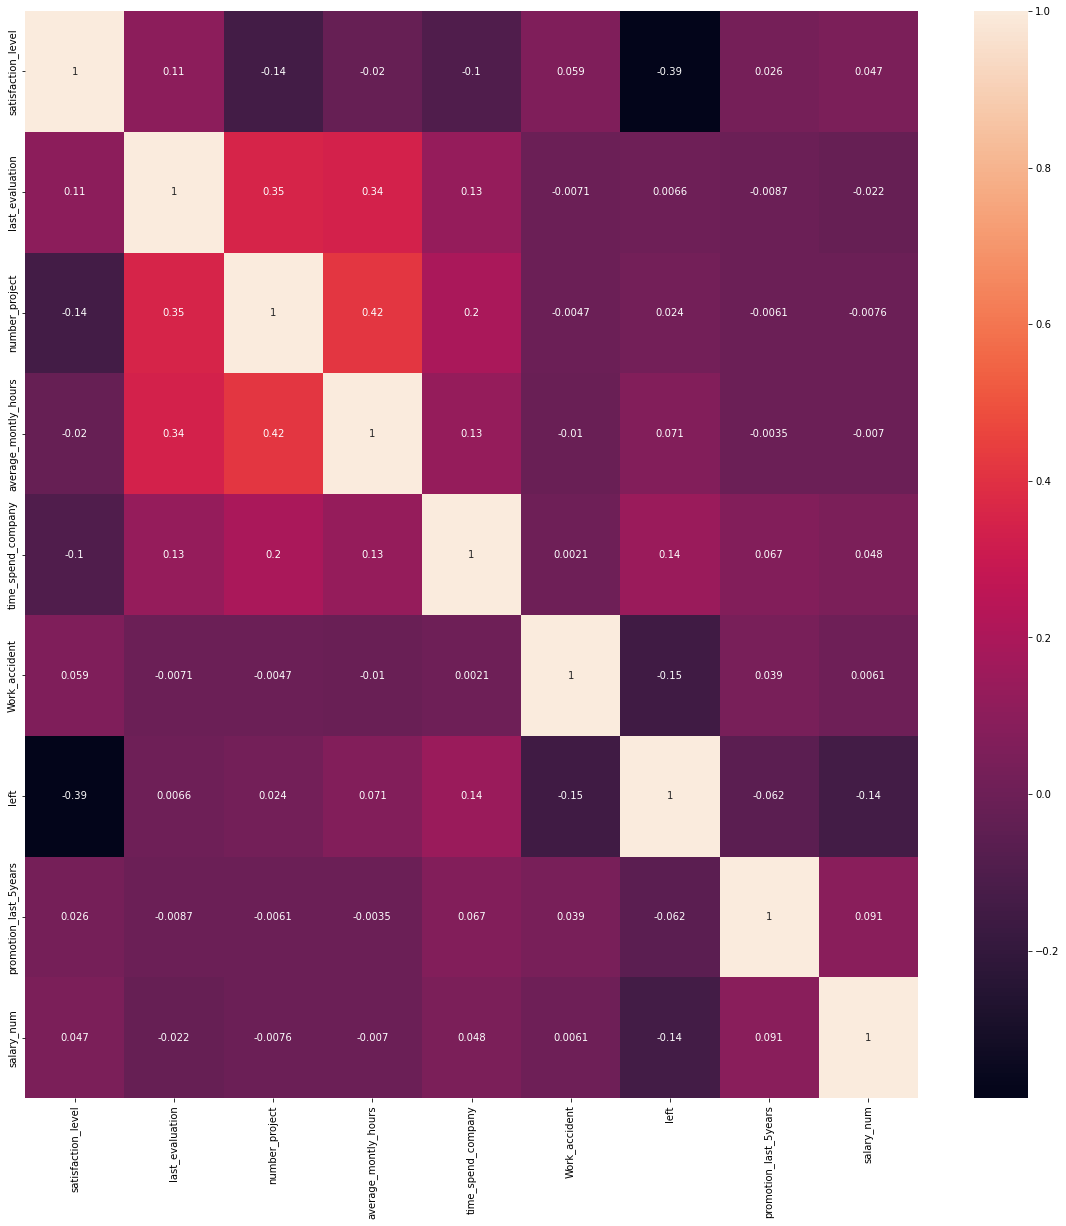

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot = True)

In [13]:
# c

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = LabelEncoder().fit_transform(df[i])

In [14]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                 int32
salary                     int32
salary_num                 int64
dtype: object

In [15]:
#d

dfnew = df.drop(columns = ['left', 'salary'])
dfnew = dfnew.drop(columns = ['last_evaluation', 'Work_accident', 'promotion_last_5years', 'time_spend_company'])

In [16]:
dfnew

,satisfaction_level,number_project,average_montly_hours,Department,salary_num
0,0.38,2,157,7,4649
1,0.80,5,262,7,34126
2,0.11,7,272,7,40522
3,0.72,5,223,7,6916
4,0.37,2,159,7,10928
...,...,...,...,...,...
14994,0.40,2,151,8,5089
14995,0.37,2,160,8,4001
14996,0.37,2,143,8,12842
14997,0.11,6,280,8,8849


In [17]:
x = dfnew.drop(columns = ['salary_num'])
y = pd.DataFrame(dfnew['salary_num'])

In [18]:
# task 3

#a

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)

In [19]:
print(f"""{xtrain.shape}
{xtest.shape}
{ytrain.shape}
{ytest.shape}""")

(10499, 4)
(4500, 4)
(10499, 1)
(4500, 1)


In [20]:
# b
dtr = DecisionTreeRegressor(max_depth=4, min_samples_split=5, max_leaf_nodes=10).fit(xtrain, ytrain)
ypred = dtr.predict(xtest)
print(ypred)
print('__________________________')
print(dtr.score(xtrain, ytrain))

[29263.5652439  29263.5652439  29263.5652439  ... 29263.5652439
 29263.5652439  29380.16384181]
__________________________
0.048691091343427084


In [21]:
#c
print(dtr.score(xtest, ytest))

0.03704461270036952


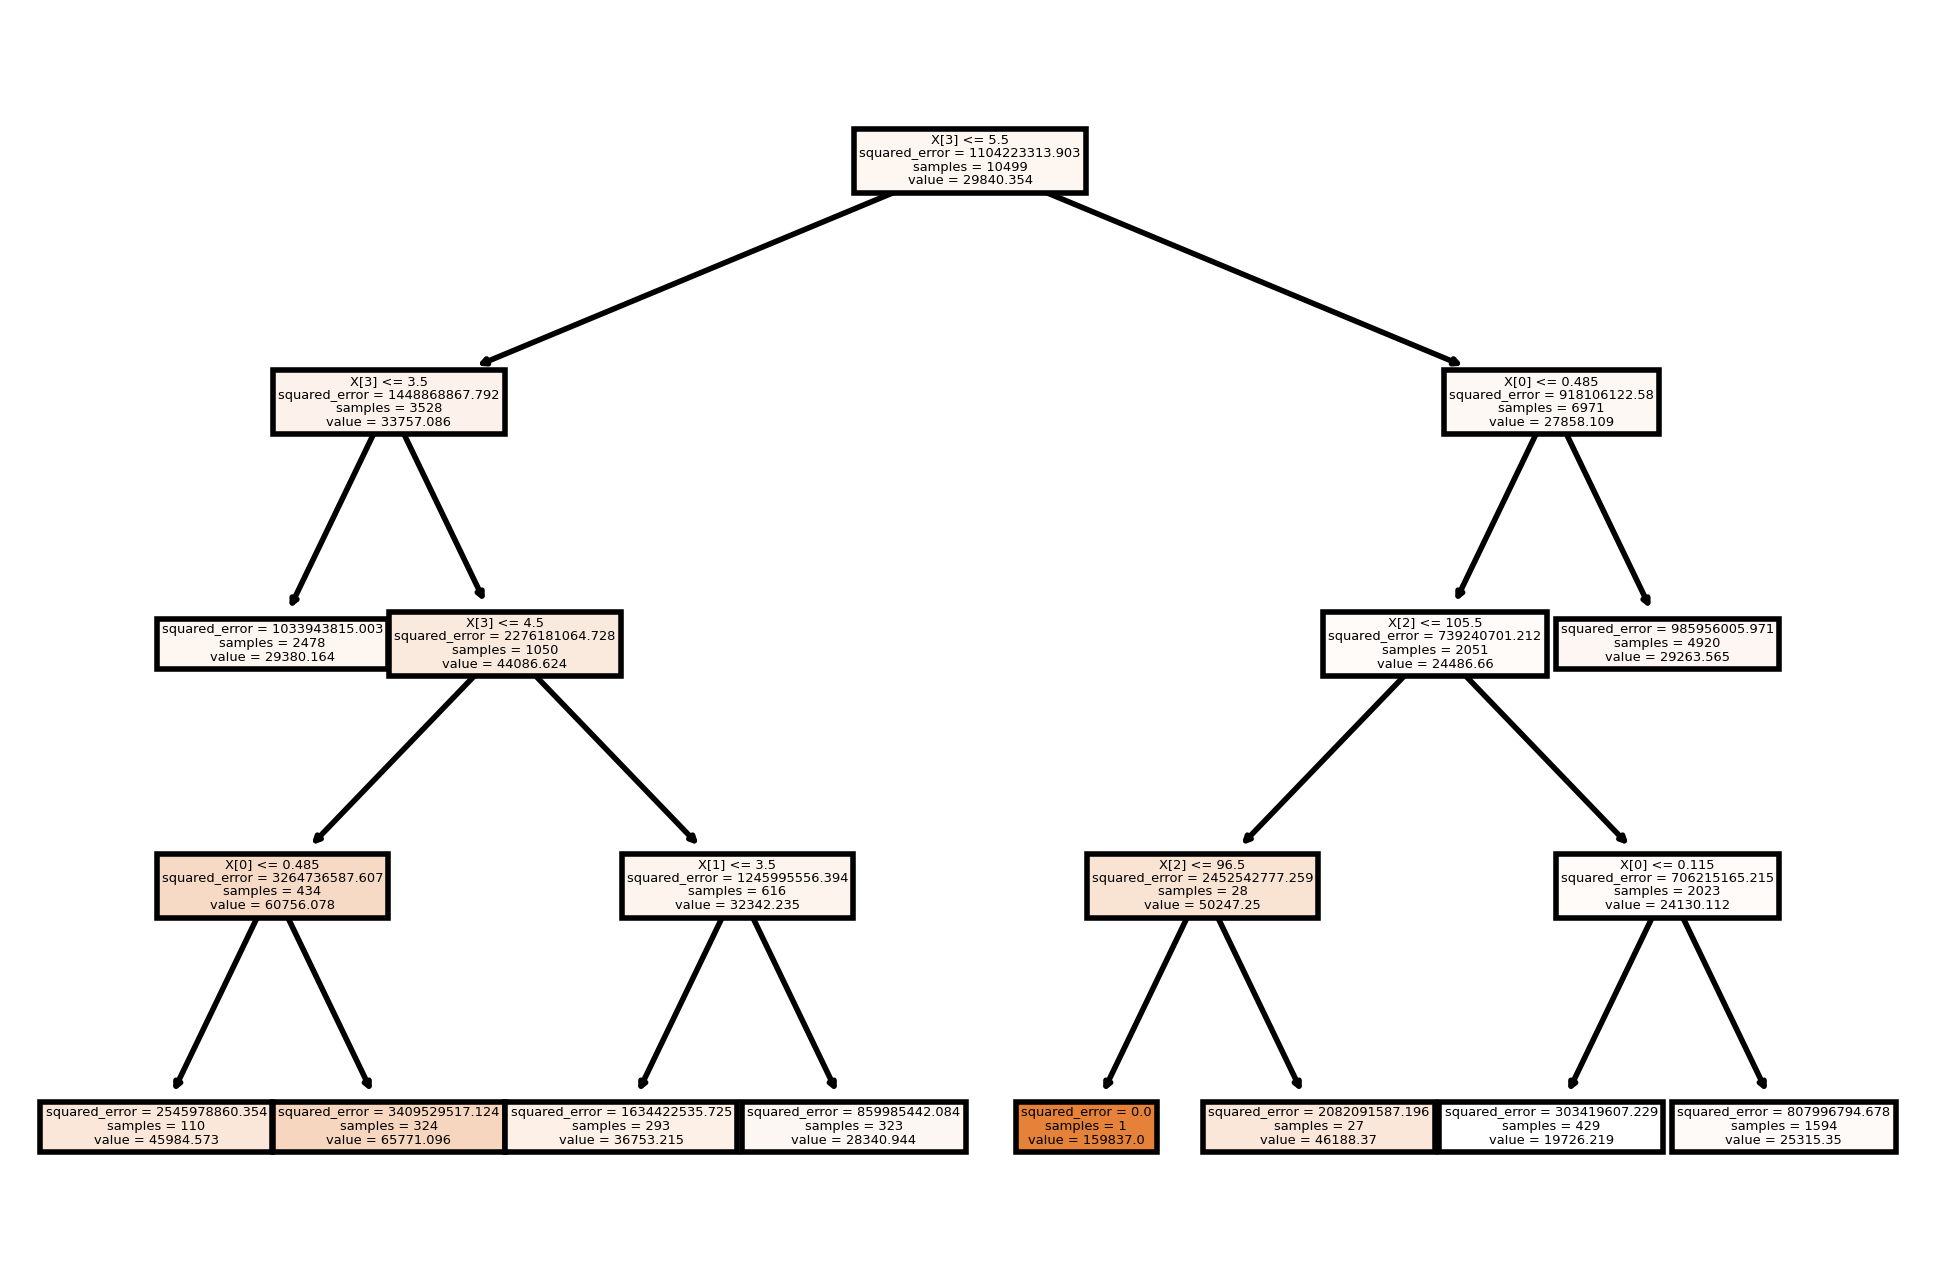

In [22]:
# d

plt.figure(dpi = 400)
tree.plot_tree(dtr , filled = True);

In [23]:
# task 4

In [24]:
mt.r2_score(ytest , ypred)

0.03704461270036952

In [25]:
mt.mean_absolute_error(ytest , ypred)

20888.828004677784

In [26]:
mt.mean_squared_error(ytest , ypred)

1113032013.7853281